In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss
import matplotlib.colors
from tqdm import tqdm_notebook
import seaborn as sns
import imageio

## Real Data Example

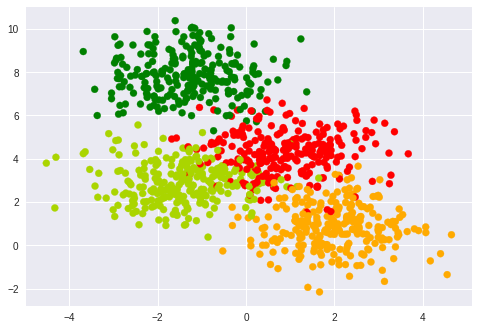

In [0]:
# Create data
from sklearn.datasets import make_blobs

data, labels = make_blobs(n_samples=1000, centers=4, n_features=2, random_state=0)
my_cmap1 = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])
plt.scatter(data[:,0], data[:,1], c=labels,cmap=my_cmap1)
plt.show()

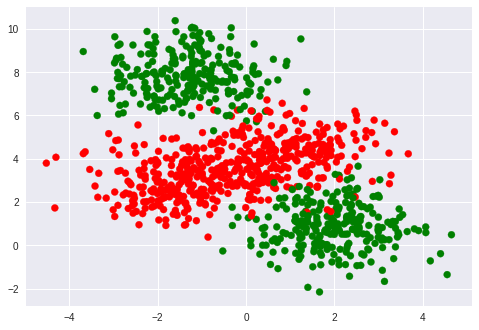

In [0]:
labels_orig = labels
labels = np.mod(labels_orig, 2)
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","green"])
plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)
plt.show()

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(data, labels, stratify=labels, random_state=0)
print(X_train.shape, X_test.shape)

(750, 2) (250, 2)


## Neural Network class with 2 hidden layers

In [0]:
class NN_3_Layers:
  
  def __init__(self):
    np.random.seed(0)
    self.w1 = np.random.rand()
    self.w2 = np.random.rand()
    self.w3 = np.random.rand()
    self.w4 = np.random.rand()
    self.w5 = np.random.rand()
    self.w6 = np.random.rand()
    self.w7 = np.random.rand()
    self.w8 = np.random.rand()
    self.w9 = np.random.rand()
    self.w10 = np.random.rand()
    
    self.b1 = 0
    self.b2 = 0
    self.b3 = 0
    self.b4 = 0
    self.b5 = 0
    
  def sigmoid(self,x):
    return 1/(1+np.exp(-x))
  
  def forward_pass(self,x):
    self.x1,self.x2 = x
    
    # 1. Layer 1
    # 1.1 Neuron 1
    self.a1 = self.w1*self.x1 + self.w2*self.x2 + self.b1
    self.h1 = self.sigmoid(self.a1)
    # 1.2 Neuron 2
    self.a2 = self.w3*self.x1 + self.w4*self.x2 + self.b2
    self.h2 = self.sigmoid(self.a2)
    
    
    # Layer 2
    # 2.1 Neuron 3
    self.a3 = self.w5*self.h1 + self.w6*self.h2 + self.b3
    self.h3 = self.sigmoid(self.a3)
    # 2.2 Neuron 4
    self.a4 = self.w7*self.h1 + self.w8*self.h2 + self.b4
    self.h4 = self.sigmoid(self.a4)
    
    # Layer 3
    self.a5 = self.w9*self.h3 + self.w10*self.h4 + self.b5
    self.h5 = self.sigmoid(self.a5)
   
    return self.h5
  
  def grad(self,x,y):
    
    self.forward_pass(x)
    
    # Backpropagation in  - 
    # 1. Layer 3
    self.dw9 = (self.h5-y) * self.h3
    self.dw10 = (self.h5-y) * self.h4
    self.db5 = (self.h5-y)
    
    # 2. Layer 2
    self.dw5 = (self.h5-y) * self.w9 * self.h3*(1-self.h3) * self.h1
    self.dw6 = (self.h5-y) * self.w9 * self.h3*(1-self.h3) * self.h2
    self.dw7 = (self.h5-y) * self.w10 * self.h4*(1-self.h4) * self.h1
    self.dw8 = (self.h5-y) * self.w10 * self.h4*(1-self.h4) * self.h2
    self.db3 = (self.h5-y) * self.w9 * self.h3*(1-self.h3)
    self.db4 = (self.h5-y) * self.w10 * self.h4*(1-self.h4)
   
    # 3. Layer 1
    self.dw1 = (self.h5-y) * self.w9 * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1) * self.x1
    self.dw2 = (self.h5-y) * self.w9 * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1) * self.x2
    self.dw3 = (self.h5-y) * self.w10 * self.h4*(1-self.h4) * self.w8 * self.h2*(1-self.h2) * self.x1
    self.dw4 = (self.h5-y) * self.w10 * self.h4*(1-self.h4) * self.w8 * self.h2*(1-self.h2) * self.x2
    self.db1 = (self.h5-y) * self.w9 * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1)
    self.db2 = (self.h5-y) * self.w10 * self.h4*(1-self.h4) * self.w8 * self.h2*(1-self.h2)

  def predict(self,X):
    Y_pred = []
    for x in X:
      Y_pred.append(self.forward_pass(x))
    return np.array(Y_pred)
  
  def fit(self, X,Y, epochs = 1,learning_rate = 1, initialise=True,display_loss=False):
    
    if initialise:
      np.random.seed(0)
      self.w1 = np.random.rand()
      self.w2 = np.random.rand()
      self.w3 = np.random.rand()
      self.w4 = np.random.rand()
      self.w5 = np.random.rand()
      self.w6 = np.random.rand()
      self.w7 = np.random.rand()
      self.w8 = np.random.rand()
      self.w9 = np.random.rand()
      self.w10 = np.random.rand()

      self.b1 = 0
      self.b2 = 0
      self.b3 = 0
      self.b4 = 0
      self.b5 = 0
      
    if display_loss:
      loss = {}
      
    self.weights = {}
        
    for i in tqdm_notebook(range(epochs),total=epochs,unit='Epoch'):
      
      # initialise the grads to zero
      dw1,dw2,dw3,dw4,dw5,dw6,dw7,dw8,dw9,dw10,db1,db2,db3,db4,db5 = [0]*15
      # then compute the grad for given weigths and input and update the grad as per the loss value
      for x,y in zip(X,Y):
        # first calculate the grad for each x,y value
        self.grad(x,y)
        # storing it in an external value
        dw1 += self.dw1
        dw2 += self.dw2
        dw3 += self.dw3
        dw4 += self.dw4
        dw5 += self.dw5
        dw6 += self.dw6
        dw7 += self.dw7
        dw8 += self.dw8
        dw9 += self.dw9
        dw10 += self.dw10
        
        db1 += self.db1
        db2 += self.db2
        db3 += self.db3
        db4 += self.db4
        db5 += self.db5
        
      # now update the weight based on the average grad value all over the x values
      m = X.shape[0]
      self.w1 -= learning_rate*dw1/m
      self.w2 -= learning_rate*dw2/m
      self.w3 -= learning_rate*dw3/m
      self.w4 -= learning_rate*dw4/m
      self.w5 -= learning_rate*dw5/m
      self.w6 -= learning_rate*dw6/m
      self.w7 -= learning_rate*dw7/m
      self.w8 -= learning_rate*dw8/m
      self.w9 -= learning_rate*dw9/m
      self.w10 -= learning_rate*dw10/m
      
      self.b1 -= learning_rate*db1/m
      self.b2 -= learning_rate*db2/m
      self.b3 -= learning_rate*db3/m
      self.b4 -= learning_rate*db4/m
      self.b5 -= learning_rate*db5/m
      
      Y_pred = self.predict(X)
    
      if display_loss:
        Y_pred = self.predict(X)
        loss[i] = log_loss(Y,Y_pred)
      
      # store the weigths on every iterations
      layer1 = [0,0,self.w9, self.w10,self.b5,0]
      layer2 = [self.w5, self.w6, self.w7, self.w8, self.b3, self.b4]
      layer3 = [self.w1, self.w2, self.w3, self.w4, self.b1, self.b2]
      self.weights[i] = np.vstack((layer1,layer2,layer3))
        
            
    if display_loss:
      plt.plot(loss.values())
      plt.xlabel('Epochs')
      plt.ylabel('Cross Entropy Loss')
      plt.show()


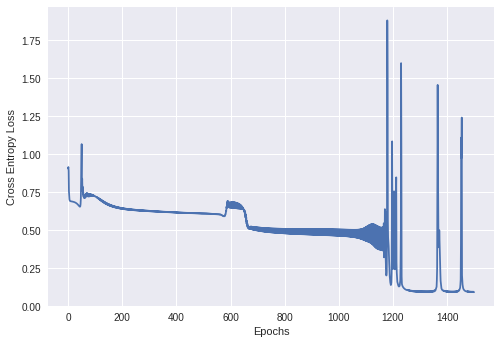

In [0]:
NN = NN_3_Layers()
epochs = 1500
NN.fit(X_train, Y_train, epochs = epochs,learning_rate = 5, initialise=True,display_loss=True)

In [0]:
Y_predict = NN.predict(X_train)
Y_predict_binarised = (Y_predict>=0.5).astype(np.int)
print('Train accuracy',accuracy_score(Y_predict_binarised,Y_train))

Y_predict_test = NN.predict(X_test)
Y_predict_binarised_test = (Y_predict_test>=0.5).astype(np.int)
print('Test accuracy',accuracy_score(Y_predict_binarised_test,Y_test))

Train accuracy 0.972
Test accuracy 0.94


## Visualizing the Learning of neural networks

In [0]:
W = NN.weights

def sigmoid(x):
    return 1/(1+np.exp(-x))
  
def predict(weights,X):
  x1,x2 = X
  w9 = weights[0][2]
  w10 = weights[0][3]
  b5 = weights[0][4]
  # layer 2
  w5 = weights[1][0]
  w6 = weights[1][1]
  w7 = weights[1][2]
  w8 = weights[1][3]
  b3 = weights[1][4]
  b4 = weights[1][5]
  
  # layer 1
  w1 = weights[2][0]
  w2 = weights[2][1]
  w3 = weights[2][2]
  w4 = weights[2][3]
  b1 = weights[2][4]
  b2 = weights[2][5]
  
  # FORWARD PASS
  a1 = w1*x1 + w2*x2 + b1
  h1 = sigmoid(a1)
  # 1.2 Neuron 2
  a2 = w3*x1 + w4*x2 + b2
  h2 = sigmoid(a2)


  # Layer 2
  # 2.1 Neuron 3
  a3 = w5*h1 + w6*h2 + b3
  h3 = sigmoid(a3)
  # 2.2 Neuron 4
  a4 = w7*h1 + w8*h2 + b4
  h4 = sigmoid(a4)

  # Layer 3
  a5 = w9*h3 + w10*h4 + b5
  h5 = sigmoid(a5)
  
  return h1,h2,h3,h4,h5


# make the contour plots for every epochs
outputs = []
neuron1_preds = []
neuron2_preds = []
neuron3_preds = []
neuron4_preds = []

x1 = np.linspace(min(data[:,0]), max(data[:,0]),100)
x2 = np.linspace(min(data[:,1]), max(data[:,1]),100)
X1,X2 = np.meshgrid(x1,x2)

for w in tqdm_notebook(W.values(),unit='epochs',total=epochs):
  output = np.zeros(X1.shape)
  neuron1 = np.zeros(X1.shape)
  neuron2 = np.zeros(X1.shape)
  neuron3 = np.zeros(X1.shape)
  neuron4 = np.zeros(X1.shape)
  

  for i in range(len(x1)):
    for j in range(len(x2)):
      value = x1[i],x2[j]
      h1,h2,h3,h4,h5 = predict(w,value)
   
      neuron1[j,i] = (h1>=0.5).astype(np.int)
      neuron2[j,i] = (h2>=0.5).astype(np.int)
      neuron3[j,i] = (h3>=0.5).astype(np.int)
      neuron4[j,i] = (h4>=0.5).astype(np.int)
      
      output[j,i] = (h5>=0.5).astype(np.int)
      
      
  outputs.append(output)
  neuron1_preds.append(neuron1)
  neuron2_preds.append(neuron2)
  neuron3_preds.append(neuron3)
  neuron4_preds.append(neuron4)

In [0]:
weights = NN.weights[150]
weights[1][2]

-0.27771537129226304

In [0]:
def plot_heat_map(epoch):
    fig = plt.figure(figsize=(10, 2))
    
    ## plot the contour    
    fig = plt.figure()
    fig.set_size_inches(15,10)
    fig.suptitle('Epoch: '+str(epoch),fontsize=20)

    ax1 = plt.subplot(3,2,1)
    ax1.contourf(X1,X2,outputs[epoch],cmap=my_cmap,alpha=0.3)
    ax1.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)
    ax1.set_title('Ouput')

    ax2 = plt.subplot(3,2,3)
    ax2.contourf(X1,X2,neuron3_preds[epoch],cmap=my_cmap,alpha=0.3)
    ax2.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)
    ax2.set_title('Prediction by Neuron 3')

    ax3 = plt.subplot(3,2,4)
    ax3.contourf(X1,X2,neuron4_preds[epoch],cmap=my_cmap,alpha=0.3)
    ax3.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)
    ax3.set_title('Prediction by Neuron 4')
    
    ax4 = plt.subplot(3,2,5)
    ax4.contourf(X1,X2,neuron1_preds[epoch],cmap=my_cmap,alpha=0.3)
    ax4.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)
    ax4.set_title('Prediction by Neuron 1')
    
    ax5 = plt.subplot(3,2,6)
    ax5.contourf(X1,X2,neuron2_preds[epoch],cmap=my_cmap,alpha=0.3)
    ax5.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)
    ax5.set_title('Prediction by Neuron 2')
    
    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    return image
  
  
img = imageio.mimsave('./neurons_viz.gif', [plot_heat_map(i) for i in range(0,epochs,epochs//10)], fps=1)

Output hidden; open in https://colab.research.google.com to view.

## Visualizing the Weights

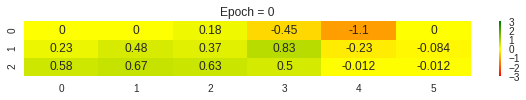

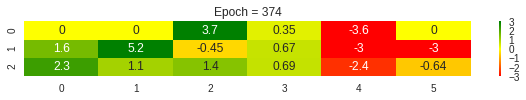

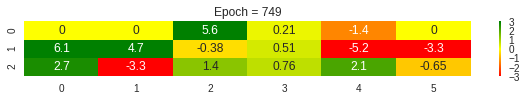

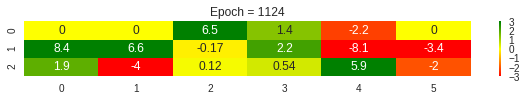

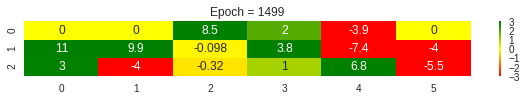

In [0]:
# plot the weigths 
values = np.linspace(0,epochs-1,5).astype(int)

for i in values:
  plt.figure(figsize=(10,1))
  plt.title("Epoch = "+str(i))
  sns.heatmap(NN.weights[i],cmap=my_cmap,annot=True,vmin=-3,vmax=3)
  plt.show()